In [1]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2023-06-02 16:54:42.268303: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-02 16:54:42.307249: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 16:54:42.906292: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.config.list_physical_devices('GPU')

2023-06-02 16:54:43.869659: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2023-06-02 16:54:43.900799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 16:54:43.901044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [5]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

In [8]:
# Data normalization
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255. 

In [9]:
X_train.dtype

dtype('float64')

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

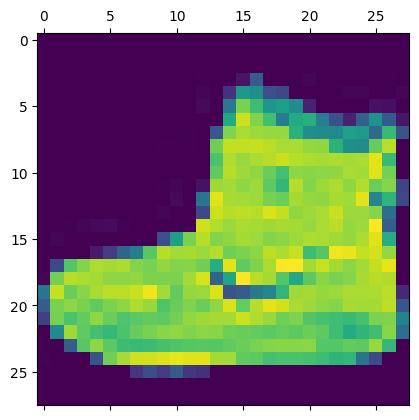

In [11]:
plt.matshow(X_train[0])

In [12]:
tf.random.set_seed(42)

In [13]:
model = K.Sequential()

2023-06-02 16:54:44.545012: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 16:54:44.545161: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 16:54:44.545244: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
model

In [15]:
model.add(K.layers.Input(shape=[28, 28]))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(300, activation='relu'))
model.add(K.layers.Dense(100, activation='relu'))
model.add(K.layers.Dense(10, activation='softmax'))

In [16]:
#model=K.Sequential([K.layers.Flatten(input_shape=[28, 28]),
#                   K.layers.Dense(300, activation='relu'),
#                   K.layers.Dense(100, activation='relu'),
#                   K.layers.Dense(10, activation='softmax')
#                   ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
K.activations.relu

<function keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

In [19]:
model.layers

In [20]:
hidden=model.layers[1]

In [21]:
hidden.name

'dense'

In [22]:
model.get_layer('dense')==hidden

True

In [23]:
weights, biases=hidden.get_weights()

In [24]:
weights

array([[-0.02335322, -0.0687044 ,  0.04525863, ...,  0.00517447,
         0.00705136,  0.05405585],
       [ 0.01390158,  0.02716628,  0.0241041 , ...,  0.01898532,
        -0.03979062, -0.06139242],
       [-0.03099069,  0.00511686, -0.03677117, ...,  0.05395746,
        -0.02644868,  0.01197836],
       ...,
       [ 0.06559721,  0.06463405, -0.06777522, ...,  0.02224743,
         0.03002958, -0.06314495],
       [-0.03418397, -0.06708144, -0.03729788, ...,  0.07324947,
         0.06005049, -0.01009761],
       [-0.07308049,  0.00068731,  0.02372818, ..., -0.03605022,
        -0.0565831 ,  0.05208114]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss=K.losses.sparse_categorical_crossentropy,
             optimizer=K.optimizers.SGD(),
             metrics=[K.metrics.sparse_categorical_accuracy])

In [28]:
K.utils.to_categorical([[6],[7]], 11)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [29]:
K.utils.to_categorical([6, 7], 11)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [30]:
np.argmax(K.utils.to_categorical([6,7], 11), axis=1)

array([6, 7])

In [ ]:
history = model.fit(X_train, y_train, 
         epochs=30,
         validation_data=[X_valid, y_valid])

Epoch 1/30


In [ ]:
history.params['epochs']


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5),
                                  xlim=[0, history.params['epochs']],
                                  ylim=[0, 1],
                                  grid=True,
                                  xlabel='Epoch',
                                  style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new=X_test[:3]

In [ ]:
y_proba=model.predict(X_new)

In [ ]:
y_proba.round(2)

In [ ]:
y_pred=y_proba.argmax(axis=1)

In [ ]:
np.array(class_names)[y_pred]